## MechaRela Numerical Simulation - Solution 2

## Falling object with air friction - part 2

### Friction
In our previous exercise we incorporated the effect of air friction. We used Stokes' Law to describe the frictional force as 

$\vec{F}_f = - 6\pi \mu R \vec{v}$

with $R$ the radius of the sphere and $\mu = 1.8 \cdot 10^{-5} kg/ms$ the viscosity of air at ambient conditions.

As mentioned. this description for the air friction holds for 'low' velocities of the sphere. 
In general the friction force can be approximated by the follow expression:

$\vec{F}_f = - C_D \frac{\pi}{4}D^2 \frac{1}{2}\rho_{air}v^2 \frac{\vec{v}}{v}$

with $D$ the diameter of the sphere and $C_D$ the so-called friciton coefficient. No exact expression for $C_D$ exists that holds for all possible velocities. However, several approximations exists. We will use the following one:

$C_D = \left \{ \begin{eqnarray} &\frac{24}{Re} \left ( 1 + 0.15 \cdot Re^{0.678} \right ) &\text{if Re<1000}\\ &0.41 &\text{else} \end{eqnarray} \right .$ 

where $Re \equiv \frac{\rho_{air} v D}{\mu}$ is the Reynolds number, $\rho_{air}$ is the density of air ($\approx 1.2 kg/m^3$, $D$ the diamater of the sphere, $v$ its velocity and $\mu$ the viscosity of air ($\approx 1.8 \cdot 10^{-5} kg/ms$).

Again, our task is:
<ol>
  <li>When does the sphere hit the ground?</li>
  <li>What is the velocity upon impact?</li>
</ol>

As always, you first make a drawing and set up the governing equation. This ends with Newton's second law for this case (with the x-axis pointing vertically upwards). Solving this equation analytical is quite difficult. So, we will do it numerically.

With initial conditions: $x(0) = h = 100m, v(0) = 0 m/s$

Your task: turn this into a numerical code and find the answers on the two questions. The skeleton of the code is given below.

T =  5.87 (s)
v at impact is:  -23.4  (m/s)


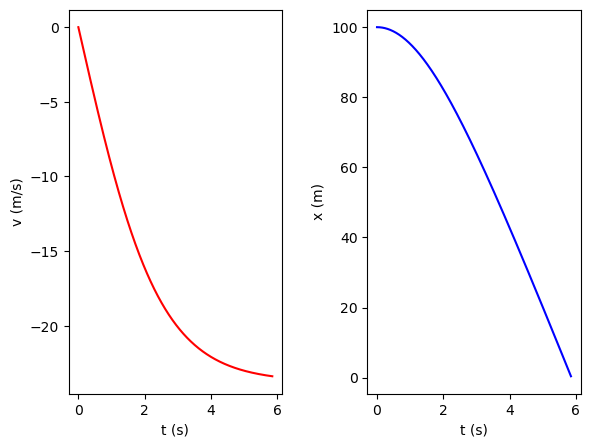

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# initiate the required variables / add additional ones if needed
# change the values if needed
N = 1000         #replace this by the value you need for your problem
Nmax = 0
dt = 1e-2       #replace this by the value you need for your problem
m = 0.0001      #mass of sphere in kg
D = 0.003       #diameter of sphere in m
rho = 1.2       #density of air
mu = 1.8e-5     #viscosity of air
h = 100.        #initial height
g = 9.813       #acceleration of gravity

i=0
t = 0*np.linspace(0,N,N+1)
v = 0*np.linspace(0,N,N+1)
x = 0*np.linspace(0,N,N+1)

# provide the initial conditions
x0 = h     #initial condition
v0 = 0     #initial condition
x[0]=x0
v[0]=v0

#define the function F/m
def force(x, v):
    eps=1e-3
    Re = rho*np.abs(v)*D/mu+eps
    if Re<1000:
        CD = 24/Re*(1+0.15*Re**0.678)
    else:
        CD = 0.41
    
    force = -g - np.pi/4.*D*D*CD*1./2.*rho*np.abs(v)*v/m      #replace this line with the actual F/m - expression
    return force

#compute the trajectory and velocity
while i < N:
    t[i+1] = (i+1)*dt
    v[i+1] = v[i] + force(x[i],v[i])*dt
    x[i+1] = x[i] + (v[i]+v[i+1])*dt/2.0
    if x[i+1]<0:
        break
    i = i+1

Nmax = i

#interpolate time to estimate the time of impact with the ground (use linear interpolation)
T = (x[i]*t[i+1]-x[i+1]*t[i])/(x[i]-x[i+1])

#print the last time before collision, the collision time and the first time after collision
#Note: everything after collision is meaningless: we did not incorprated any effect of hitting the ground
print('T = ',f"{T:.3}",'(s)')

#interpolate the velocity to find the velocity upon impact
v_col = v[i+1] + (v[i]-v[i+1])*(T-t[i+1])/(t[i]-t[i+1])
print('v at impact is: ',f"{v_col:.3}",' (m/s)')

# plot the results
plt.subplot(121)
plt.plot(t[:Nmax],v[:Nmax],'r-')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.subplot(122)
plt.plot(t[:Nmax],x[:Nmax],'b-')
plt.xlabel('t (s)')
plt.ylabel('x (m)')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# show the plots
plt.show()

**Comparison**: Compare this result to the no-friction case: the velocity up on impact with the ground is substantially lower. Moreover, the velocity no longer increases linearly with time. That is to be expected: the faster the particle moves, the bigger the friction force. 
At some point, the frictional force will (almost) equal gravity, but work in the opposite direction: the particle will move at constant speed. Use your code to find this velocity.